In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## Importing the OS and JSON Modules
import os,json

In [3]:
# Get data
df = pd.read_csv('Data/superhero_info.csv')
df.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [28]:
# Get data
df2 = pd.read_csv('Data/superhero_powers.csv')
df2.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [5]:
## save the 2 new columns into the dataframe
df[['Hero','Publisher']] = df['Hero|Publisher'].str.split('|',expand=True)
df.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


In [6]:
## drop the original column 
df = df.drop(columns=['Hero|Publisher'])
df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}",Abin Sur,DC Comics
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",Abomination,Marvel Comics
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}",Absorbing Man,Marvel Comics


In [7]:
# Check if there is Duplicated Values
d1 =df.duplicated().sum()
d2 =df2.duplicated().sum()
print(d1)
print(d2)

0
0


In [8]:
# Check if there is null value
isna1 = df.isna().sum()
isna2 = df2.isna().sum()
print(isna1)
print(isna2)

Gender          0
Race            0
Alignment       0
Hair color      0
Eye color       0
Skin color      0
Measurements    0
Hero            0
Publisher       0
dtype: int64
hero_names    0
Powers        0
dtype: int64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Gender        463 non-null    object
 1   Race          463 non-null    object
 2   Alignment     463 non-null    object
 3   Hair color    463 non-null    object
 4   Eye color     463 non-null    object
 5   Skin color    463 non-null    object
 6   Measurements  463 non-null    object
 7   Hero          463 non-null    object
 8   Publisher     463 non-null    object
dtypes: object(9)
memory usage: 32.7+ KB


In [10]:
Measurs= df['Measurements'].replace("","'")
Measurs

0      {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1       {'Height': '191.0 cm', 'Weight': '65.0 kg'}
2       {'Height': '185.0 cm', 'Weight': '90.0 kg'}
3      {'Height': '203.0 cm', 'Weight': '441.0 kg'}
4      {'Height': '193.0 cm', 'Weight': '122.0 kg'}
                           ...                     
458     {'Height': '183.0 cm', 'Weight': '83.0 kg'}
459     {'Height': '165.0 cm', 'Weight': '52.0 kg'}
460      {'Height': '66.0 cm', 'Weight': '17.0 kg'}
461     {'Height': '170.0 cm', 'Weight': '57.0 kg'}
462     {'Height': '185.0 cm', 'Weight': '81.0 kg'}
Name: Measurements, Length: 463, dtype: object

In [11]:
# Make a list of all characters to replace
to_replace = [": '"]
# run a loop to replace all of the characters in the list at once
for char in to_replace:
    Measurs = Measurs.str.replace(char,': ',regex=False)
    
Measurs

0      {'Height': 203.0 cm', 'Weight': 441.0 kg'}
1       {'Height': 191.0 cm', 'Weight': 65.0 kg'}
2       {'Height': 185.0 cm', 'Weight': 90.0 kg'}
3      {'Height': 203.0 cm', 'Weight': 441.0 kg'}
4      {'Height': 193.0 cm', 'Weight': 122.0 kg'}
                          ...                    
458     {'Height': 183.0 cm', 'Weight': 83.0 kg'}
459     {'Height': 165.0 cm', 'Weight': 52.0 kg'}
460      {'Height': 66.0 cm', 'Weight': 17.0 kg'}
461     {'Height': 170.0 cm', 'Weight': 57.0 kg'}
462     {'Height': 185.0 cm', 'Weight': 81.0 kg'}
Name: Measurements, Length: 463, dtype: object

In [12]:
# Make a list of all characters to replace
to_replace = ["cm'"]
# run a loop to replace all of the characters in the list at once
for char in to_replace:
    Measurs = Measurs.str.replace(char,'',regex=False)
    
Measurs

0      {'Height': 203.0 , 'Weight': 441.0 kg'}
1       {'Height': 191.0 , 'Weight': 65.0 kg'}
2       {'Height': 185.0 , 'Weight': 90.0 kg'}
3      {'Height': 203.0 , 'Weight': 441.0 kg'}
4      {'Height': 193.0 , 'Weight': 122.0 kg'}
                        ...                   
458     {'Height': 183.0 , 'Weight': 83.0 kg'}
459     {'Height': 165.0 , 'Weight': 52.0 kg'}
460      {'Height': 66.0 , 'Weight': 17.0 kg'}
461     {'Height': 170.0 , 'Weight': 57.0 kg'}
462     {'Height': 185.0 , 'Weight': 81.0 kg'}
Name: Measurements, Length: 463, dtype: object

In [13]:
# Make a list of all characters to replace
to_replace = ["kg'"]
# run a loop to replace all of the characters in the list at once
for char in to_replace:
    Measurs = Measurs.str.replace(char,'',regex=False)
    
Measurs

0      {'Height': 203.0 , 'Weight': 441.0 }
1       {'Height': 191.0 , 'Weight': 65.0 }
2       {'Height': 185.0 , 'Weight': 90.0 }
3      {'Height': 203.0 , 'Weight': 441.0 }
4      {'Height': 193.0 , 'Weight': 122.0 }
                       ...                 
458     {'Height': 183.0 , 'Weight': 83.0 }
459     {'Height': 165.0 , 'Weight': 52.0 }
460      {'Height': 66.0 , 'Weight': 17.0 }
461     {'Height': 170.0 , 'Weight': 57.0 }
462     {'Height': 185.0 , 'Weight': 81.0 }
Name: Measurements, Length: 463, dtype: object

In [14]:
df['Measurements'] = Measurs
df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': 203.0 , 'Weight': 441.0 }",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': 191.0 , 'Weight': 65.0 }",Abe Sapien,Dark Horse Comics
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': 185.0 , 'Weight': 90.0 }",Abin Sur,DC Comics
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': 203.0 , 'Weight': 441.0 }",Abomination,Marvel Comics
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': 193.0 , 'Weight': 122.0 }",Absorbing Man,Marvel Comics


In [15]:
## use .str.replace to replace all single quotes
df['Measurements'] = df['Measurements'].str.replace("'",'"')
## Apply the json.loads to the full column
df['Measurements'] = df['Measurements'].apply(json.loads)
df['Measurements'].head()

0    {'Height': 203.0, 'Weight': 441.0}
1     {'Height': 191.0, 'Weight': 65.0}
2     {'Height': 185.0, 'Weight': 90.0}
3    {'Height': 203.0, 'Weight': 441.0}
4    {'Height': 193.0, 'Weight': 122.0}
Name: Measurements, dtype: object

In [16]:
## check a single value after transformation
test_Measurs = df.loc[0, 'Measurements']
print(type(test_Measurs))
test_Measurs

<class 'dict'>


{'Height': 203.0, 'Weight': 441.0}

In [17]:
H_W = df['Measurements'].apply(pd.Series)
H_W

,Height,Weight
0,203.0,441.0
1,191.0,65.0
2,185.0,90.0
3,203.0,441.0
4,193.0,122.0
...,...,...
458,183.0,83.0
459,165.0,52.0
460,66.0,17.0
461,170.0,57.0


In [18]:
# concat long_lat with original dataframe
df = pd.concat((df, H_W), axis = 1)
df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': 203.0, 'Weight': 441.0}",A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': 191.0, 'Weight': 65.0}",Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,"{'Height': 185.0, 'Weight': 90.0}",Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': 203.0, 'Weight': 441.0}",Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,"{'Height': 193.0, 'Weight': 122.0}",Absorbing Man,Marvel Comics,193.0,122.0


In [20]:
## drop the original column 
df = df.drop(columns=['Measurements'])
df.head()

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0


In [29]:
df2.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [32]:
## showing the lists are really strings
df2.loc[2,'Powers']

'Agility,Accelerated Healing,Cold Resistance,Durability,Underwater breathing,Marksmanship,Weapons Master,Longevity,Intelligence,Super Strength,Telepathy,Stamina,Immortality,Reflexes,Enhanced Sight,Sub-Mariner'

In [44]:
#df['Powers'].value_counts()
# Create a new column where the single quotes are replaced by double quotes
df2['Powers_split'] = df2['Powers'].str.replace(",","','")
df2['Powers_split']= "['" + df2['Powers_split'].astype(str)+ "']"
df2['Powers_split']
df2.loc[2,'Powers_split']

"['Agility','Accelerated Healing','Cold Resistance','Durability','Underwater breathing','Marksmanship','Weapons Master','Longevity','Intelligence','Super Strength','Telepathy','Stamina','Immortality','Reflexes','Enhanced Sight','Sub-Mariner']"

In [47]:
# Create a new column where the single quotes are replaced by double quotes
df2['Powers_split'] = df2['Powers_split'].str.replace("'",'"')



In [48]:
# Apply json.loads to entire column
df2['Powers_split'] = df2['Powers_split'].apply(json.loads)
# check results
df2['Powers_split'].head()

0      [Agility, Super Strength, Stamina, Super Speed]
1    [Accelerated Healing, Durability, Longevity, S...
2    [Agility, Accelerated Healing, Cold Resistance...
3                                 [Lantern Power Ring]
4    [Accelerated Healing, Intelligence, Super Stre...
Name: Powers_split, dtype: object

In [49]:
df2['Powers_split'].value_counts()



[Intelligence]                                                                                                                                                                                                                                                                          8
[Durability, Super Strength]                                                                                                                                                                                                                                                            5
[Agility, Stealth, Marksmanship, Weapons Master, Stamina]                                                                                                                                                                                                                               4
[Marksmanship]                                                                                                                                            

In [50]:
## exploding the column of lists
exploded = df2.explode('Powers_split')

In [52]:
exploded

,hero_names,Powers,Powers_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing
...,...,...,...
665,Zatanna,"Cryokinesis,Telepathy,Magic,Fire Control,Proba...",Weather Control
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Super Speed
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Intangibility
666,Zoom,"Super Speed,Intangibility,Time Travel,Time Man...",Time Travel


In [53]:
## saving the unique values from the exploded column
cols_to_make = exploded['Powers_split'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [55]:
for col in cols_to_make:
    df2[col] = df2['Powers'].str.contains(col)
df2.head()

,hero_names,Powers,Powers_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
# drop transactions clumns
df2 = df2.drop(columns=['Powers','Powers_split'])
## save data for next lesson
df2.to_csv('Data/advanced_superhero_powers.csv', index=False)


In [58]:
df='Hero'


In [63]:
## merging with different column names
df_merged = df.merge(df2, left_on='Hero', right_on='hero_names', how='inner')
df_merged

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458,Male,Human,good,Blond,blue,Unknown,Yellowjacket,Marvel Comics,183.0,83.0,...,False,False,False,False,False,False,False,False,False,False
459,Female,Human,good,Strawberry Blond,blue,Unknown,Yellowjacket II,Marvel Comics,165.0,52.0,...,False,False,False,False,False,False,False,False,False,False
460,Male,Yoda's species,good,White,brown,green,Yoda,George Lucas,66.0,17.0,...,False,False,False,False,False,False,False,False,False,False
461,Female,Human,good,Black,blue,Unknown,Zatanna,DC Comics,170.0,57.0,...,True,False,False,False,False,False,False,False,False,False


In [64]:
df_merged.to_csv('Data/ final _superhero_df.csv', index=False)

Compare the average weight of super powers who have Super Speed to those who do not.

In [90]:
weight_avg=df_merged.groupby('Publisher')['Weight'].mean()
weight_avg

Publisher
DC Comics            104.188406
Dark Horse Comics    101.818182
George Lucas          77.400000
Image Comics         405.000000
Marvel Comics        119.579125
Shueisha              64.500000
Star Trek             79.000000
Team Epic TV          72.000000
Unknown               83.000000
Name: Weight, dtype: float64

In [91]:
height_avg=df_merged.groupby('Publisher')['Height'].mean()
height_avg

Publisher
DC Comics            181.923913
Dark Horse Comics    176.909091
George Lucas         159.600000
Image Comics         211.000000
Marvel Comics        191.546128
Shueisha             171.500000
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Name: Height, dtype: float64

([<matplotlib.axis.XTick at 0x227a8e0e4c0>,
 [Text(0.0, 0, 'DC Comics'),
  Text(1.0, 0, 'Dark Horse Comics'),
  Text(2.0, 0, 'George Lucas'),
  Text(3.0, 0, 'Image Comics'),
  Text(4.0, 0, 'Marvel Comics'),
  Text(5.0, 0, 'Shueisha'),
  Text(6.0, 0, 'Star Trek'),
  Text(7.0, 0, 'Team Epic TV'),
  Text(8.0, 0, 'Unknown')])

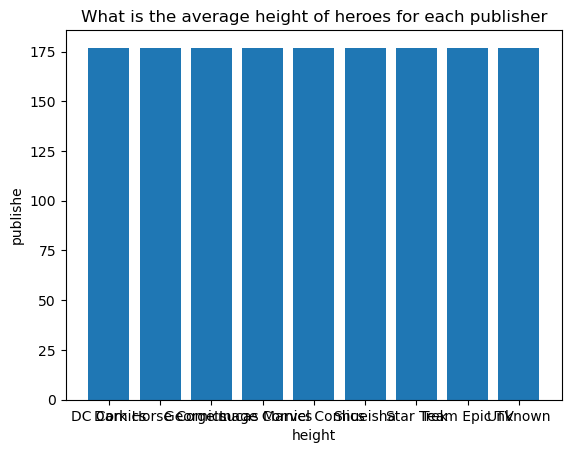

In [103]:
plt.bar(height_avg.index, height_avg[1])
plt.title('What is the average height of heroes for each publisher')
plt.ylabel('publishe')
plt.xlabel('height')
plt.xticks(height_avg.index)